# The Sparks Foundation: Data Science and Business Analytics Internship

Task 3: Exploratory Data Analysis - Retail

Perform 'Exploratory Data Analysis' on Dataset 'SampleStore'.
As a business manager, try to find out the weak areas where you can work to make profit.
What all business problems can you derive by exploring the data.

SIDDHANT SUHAS MHASKE

Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Importing and Describing Dataset

In [4]:
data=pd.read_csv('SampleSuperstore.csv')

In [5]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


In [7]:
data.shape

(9994, 13)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [10]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [11]:
data.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


Data Visualazation

1. Category VS SubCategory

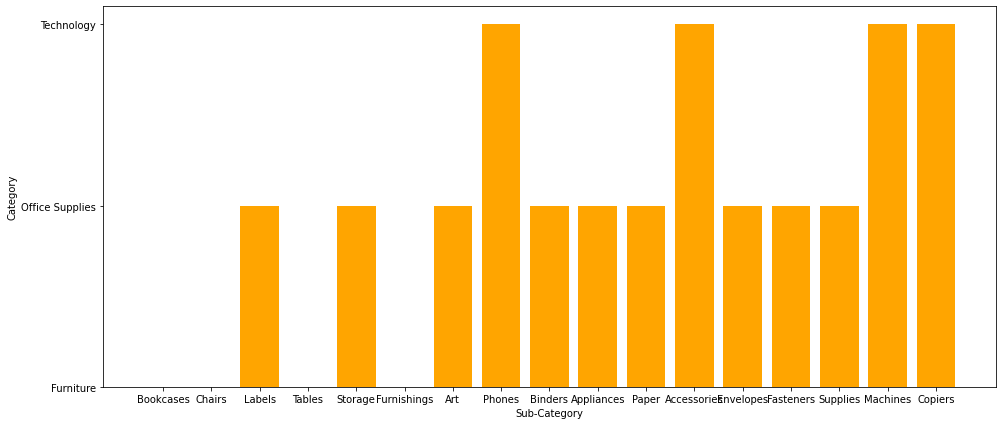

In [12]:
plt.figure(figsize=(16,7))
plt.bar('Sub-Category','Category',facecolor='orange',data=data)
plt.xlabel('Sub-Category')
plt.ylabel('Category')
plt.show()

2.Segment Visualazation

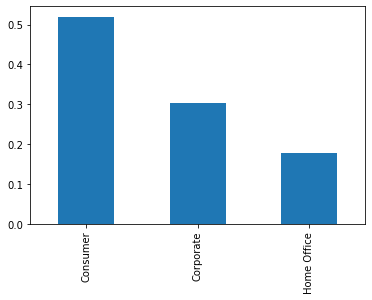

In [13]:
(data['Segment'].value_counts() / len(data['Segment']*100)).plot(kind='bar')

Results:-
    50% Consumers(approx)
    30% Corporates(approx)
    20% Home Office(approx)

3.Region Visualization

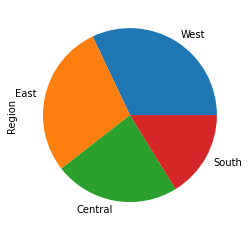

In [14]:
(data['Region'].value_counts() / len(data['Region']*100)).plot(kind='pie')

Results:-
    
    The order of most reached regions of the sales was:-
        WEST>EAST>CENTRAL>SOUTH

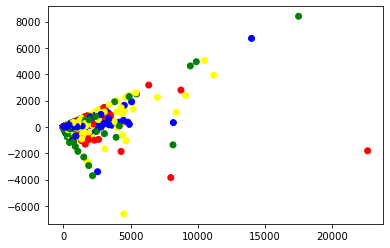

In [15]:
fig,rw=plt.subplots()
colors={'West':'blue', 'East':'yellow' , 'Central':'green','South':'red'}
rw.scatter (data['Sales'], data['Profit'], c=data['Region'].apply(lambda x:colors[x]))
plt.show()

Results:-
The super store has faced loss mostly in Central Region and the most profit was made from east and west region of the country


5) Segment wise Discount and Profit

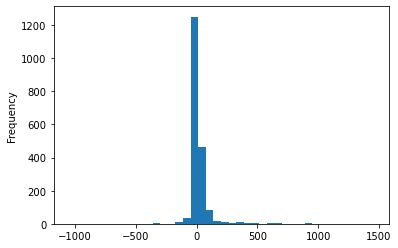

In [16]:
temp_data = data.loc[(data['Segment']=='Consumer') & (data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=40)

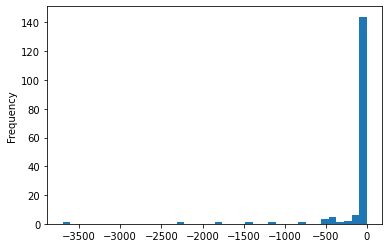

In [17]:
temp_data = data.loc[(data['Segment']=='Consumer') & (data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=40)

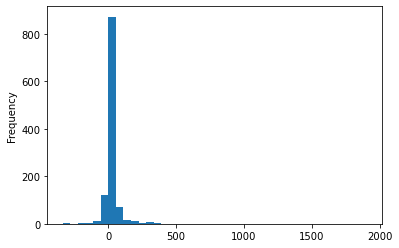

In [18]:
temp_data = data.loc[(data['Segment']=='Corporate') & (data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=40)

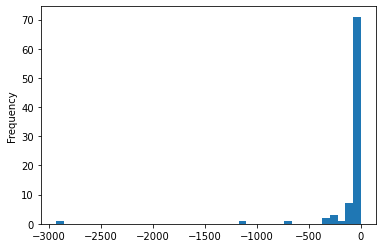

In [19]:
temp_data = data.loc[(data['Segment']=='Corporate') & (data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=40)

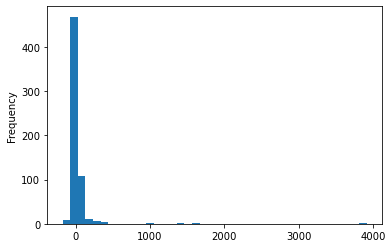

In [20]:
temp_data = data.loc[(data['Segment']=='Home Office') & (data['Discount']==0.2)]
temp_data['Profit'].plot.hist(bins=40)

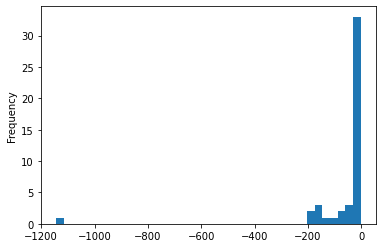

In [21]:
temp_data = data.loc[(data['Segment']=='Home Office') & (data['Discount']==0.8)]
temp_data['Profit'].plot.hist(bins=40)

Result:-
    Whenever the discount is more than 20% the superstore faces a Loss

6)State wise profit

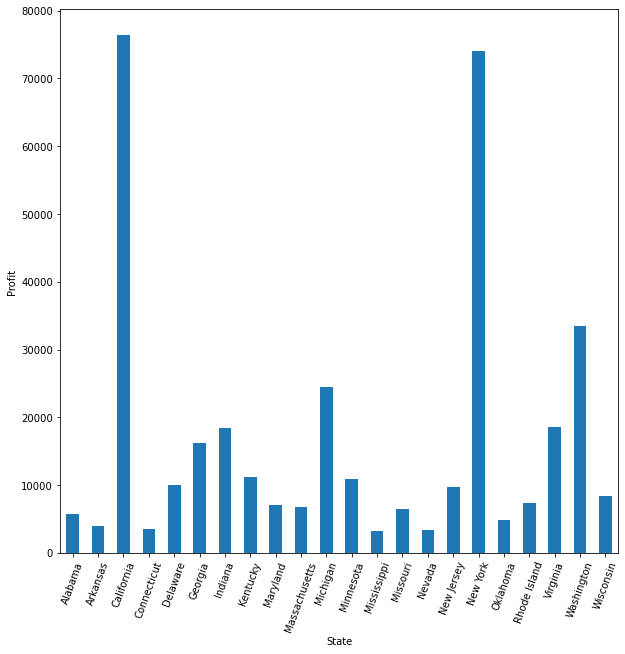

In [22]:
plt.figure(figsize=(10,10))
pro=data.groupby(['State'])['Profit'].sum()
s=pro[pro>3000]
s.sort_values(ascending=False)
s.plot.bar()
plt.ylabel('Profit')
plt.xticks(rotation=70)
plt.show()

Visualization results:-
    The state of Califoria and New York have greater profits.
The states of Mississippi, Nevada and Connecticut have lesser profits